In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import datetime
from datetime import timezone
import timestamp

In [3]:
#Load earthquake data and have a look at it
df = pd.read_csv(r'C:\Users\Hello\Documents\TDI\eq_data.csv', error_bad_lines=False)
df.head()

,Year,Month,Day,Hour,Minute,Second,Longitude,Latitude,Code,Depth,...,Ms2,Code.3,Mw,Code.4,MD,Code.5,ML,Code.6,Mweq,Code.7
0,1787,3,28,0,0,0.0,-97.0,16.0,1,0.0,...,0.0,0,8.6,99,0.0,0,0.0,0,8.6,164
1,1806,3,25,0,0,0.0,-103.8,18.9,2; 3,33.0,...,0.0,0,0.0,0,0.0,0,0.0,0,7.8,165
2,1818,5,31,0,0,0.0,-103.6,19.1,2; 3,33.0,...,0.0,0,0.0,0,0.0,0,0.0,0,8.1,165
3,1820,5,4,0,0,0.0,-99.6,17.2,2; 3,33.0,...,0.0,0,0.0,0,0.0,0,0.0,0,7.9,165
4,1837,11,22,0,0,0.0,-105.0,20.0,2; 3,33.0,...,0.0,0,0.0,0,0.0,0,0.0,0,8.1,165


In [4]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Longitude',
       'Latitude', 'Code', 'Depth', 'Code.1', 'Mb', 'code', 'Ms1', 'Code.2',
       'Ms2', 'Code.3', 'Mw', 'Code.4', 'MD', 'Code.5', 'ML', 'Code.6', 'Mweq',
       'Code.7'],
      dtype='object')

In [5]:
df['Date_time'] = pd.to_datetime(df[["Year", "Month", "Day", "Hour", "Minute", "Second"]])

In [6]:
df['Date_time']

0      1787-03-28 00:00:00.000
1      1806-03-25 00:00:00.000
2      1818-05-31 00:00:00.000
3      1820-05-04 00:00:00.000
4      1837-11-22 00:00:00.000
                 ...          
5154   2017-12-26 15:54:39.000
5155   2018-01-16 15:03:57.000
5156   2018-01-19 16:17:47.000
5157   2018-02-09 14:05:55.600
5158   2018-02-16 23:39:40.200
Name: Date_time, Length: 5159, dtype: datetime64[ns]

In [7]:
#Create object with only relevant data
df = df[['Date_time','Longitude','Latitude','Depth','Mw']]
df.head()

,Date_time,Longitude,Latitude,Depth,Mw
0,1787-03-28,-97.0,16.0,0.0,8.6
1,1806-03-25,-103.8,18.9,33.0,0.0
2,1818-05-31,-103.6,19.1,33.0,0.0
3,1820-05-04,-99.6,17.2,33.0,0.0
4,1837-11-22,-105.0,20.0,33.0,0.0


In [8]:
df['Unix_time'] = df['Date_time'].astype('int64')//1e9

In [9]:
df = df[['Unix_time','Longitude','Latitude','Depth','Mw']]
df.head()

,Unix_time,Longitude,Latitude,Depth,Mw
0,-5.767459e+09,-97.0,16.0,0.0,8.6
1,-5.168189e+09,-103.8,18.9,33.0,0.0
2,-4.783709e+09,-103.6,19.1,33.0,0.0
3,-4.722883e+09,-99.6,17.2,33.0,0.0
4,-4.168973e+09,-105.0,20.0,33.0,0.0


In [28]:
df = df[df['Mw'] > 4] 

In [29]:
#Definition of Bounding Box area which will include all spatial points
BBox = ((df.Longitude.min(),   df.Longitude.max(),      
         df.Latitude.min(), df.Latitude.max()))

In [30]:
#Loading map of Mexico to be used for geographic plot
mexico_map = plt.imread('C:/Users/Hello/Documents/TDI/map.png')

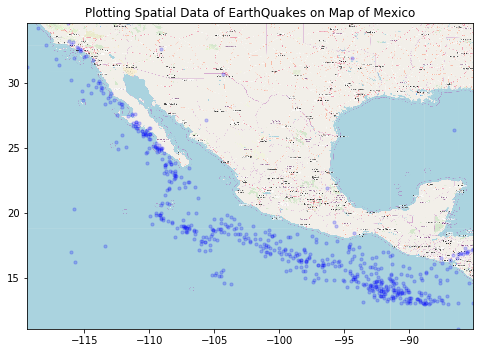

In [31]:
#Plotting spatial data on map of Mexico
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data of EarthQuakes on Map of Mexico')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mexico_map, zorder=0, extent = BBox, aspect= 'equal')

From the above map chart, it is evident that there is a pattern to the occurence of earthquakes in Mexico. It appears to occur more frequently on the southern coastal region rim of Mexico. There is a need to further investigate this pattern.

In [25]:
# selecting rows based on condition 
dangerous = df[df['Mw'] > 4] 
  
dangerous 

,Unix_time,Longitude,Latitude,Depth,Mw
0,-5.767459e+09,-97.000,16.000,0.0,8.6
10,-3.144442e+09,-96.700,15.800,33.0,7.0
22,-2.290205e+09,-95.400,16.300,33.0,7.0
29,-2.153253e+09,-87.000,13.000,0.0,7.1
32,-2.136577e+09,-91.500,14.930,25.0,7.5
...,...,...,...,...,...
5117,1.509710e+09,-106.564,18.660,10.0,5.7
5155,1.516115e+09,-86.243,11.074,71.1,6.1
5156,1.516379e+09,-110.900,26.710,10.0,6.3
5157,1.518185e+09,-104.479,19.248,71.5,6.0


ValueError: x and y must be the same size

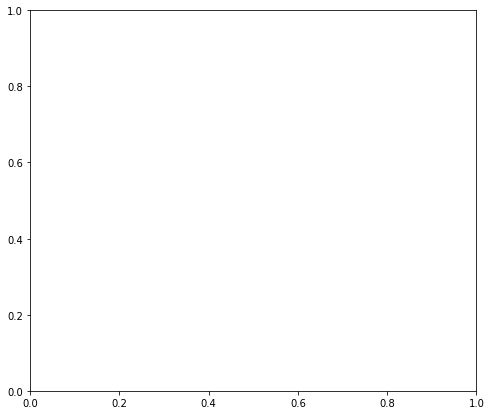

In [27]:
#Plotting spatial data on map of Mexico
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dangerous.Longitude, df.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data of EarthQuakes on Map of Mexico')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mexico_map, zorder=0, extent = BBox, aspect= 'equal')

From the above annual frequency chart of the occurence of eartquakes, it is evident that from the 1920s to the 2000s there has  been a significant increase in the occurence of earthquakes in Mexico. The question is what happened differently in between the 1920s and 2000s that led to the increase in the occurence of earthquakes. Further study into this trend, taking into consideration data on factors believed to be responsible for earthquakes will make it possible to predict the time, location and magnitude of earthquakes.

In [18]:
df = df[['Unix_time','Mw']]
df.head()

,Unix_time,Mw
0,-5.767459e+09,8.6
1,-5.168189e+09,0.0
2,-4.783709e+09,0.0
3,-4.722883e+09,0.0
4,-4.168973e+09,0.0
